# **Applied Machine Learning**
# **Programming assignment 2: Random forests**
**Group AD**

Dipti Aswal(gusaswdi@student.gu.se)

Atefeh Aminmoghaddam(gusamiat@student.gu.se)

In [ ]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


# Task 1: Working with a dataset with categorical features

## Step 1. Reading the data

In [ ]:
from google.colab import files
uploaded = files.upload()


adult_train = pd.read_csv('adult_train.csv')

adult_train.head()

Saving adult_train.csv to adult_train.csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [ ]:
from google.colab import files
uploaded = files.upload()
adult_test = pd.read_csv('adult_test.csv')

#adult_test.info()

Saving adult_test.csv to adult_test.csv


### Split into input part X and output part Y for both training and test set

In [ ]:
X_train = adult_train.drop('target', axis=1)
Y_train = adult_train['target']

X_test = adult_test.drop('target', axis=1)
Y_test = adult_test['target']

#Y_test.head()

## Step 2: Encoding the features as numbers.
### The result is a list of dictionaries each for training and test set, among which each dictionary represent one sample.

In [ ]:

X_train_dict = X_train.to_dict('records')

X_test_dict = X_test.to_dict('records')


In [ ]:
# Each row represents a sample and each column represents a feature.
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(X_train_dict)

### Since our vectorizer is already trained we will only use transform function now for test set and calculate cross validation score using Logistic Regression on training set.

In [ ]:
# Since our vectorizer is already trained we will only use transform function now for test set
X_test_encoded = dv.transform(X_test_dict)

# Logistic Regression
model= LogisticRegression()

# Calculating the score for training data
cross_val_score(model, X_train_encoded, Y_train)

array([0.79548595, 0.80236486, 0.79837224, 0.79714373, 0.79514742])

## Step 3. Combining the steps.

In [ ]:
# Create a pipeline with preprocessor and classifier
pipeline = make_pipeline(
  DictVectorizer(),
  LogisticRegression() 
)
pipeline.fit(X_train_dict, Y_train)

# Predict the target for test data
Y_test_pred = pipeline.predict(X_test_dict)

# calculate the accuracy score of true vs predicted values
print(accuracy_score(Y_test, Y_test_pred))

0.7978011178674529


# Task 2: Decision trees and random forests

## 2.1 Underfitting and overfitting in Decision tree classifiers.

### a. Evaluating TRAINING DATA set for different maxdepths

In [ ]:
maxdepth=13
list_train_scores=[]

for i in range(1, maxdepth):
    # Create a pipeline with preprocessor and classifier with max_depth as i
    pipeline = make_pipeline(
      DictVectorizer(),
      tree.DecisionTreeClassifier(max_depth=i)
    )
    pipeline.fit(X_train_dict, Y_train)

    # Predict the target for training data
    Y_train_pred = pipeline.predict(X_train_dict)

    # calculate the evaluation score on the training set 
    list_train_scores.append(accuracy_score(Y_train, Y_train_pred))

print(list_train_scores)

[0.7591904425539756, 0.8282300912134148, 0.8438930008292128, 0.8439544240041768, 0.8520929946868954, 0.8569454255090445, 0.8586038512330703, 0.8606308160068794, 0.8639783790424127, 0.8704278124136237, 0.8748195694235436, 0.8799176929455483]


### b. Evaluating TEST DATA set for different maxdepths

In [ ]:
maxdepth=13
list_test_scores=[]

for i in range(1, maxdepth):
    # Create a pipeline with preprocessor and classifier with max_depth as i
    pipeline = make_pipeline(
      DictVectorizer(),
      tree.DecisionTreeClassifier(max_depth=i)
    )
    pipeline.fit(X_train_dict, Y_train)

    # Predict the target for test data
    Y_test_pred = pipeline.predict(X_test_dict)

    # calculate the evaluation score on the test set 
    list_test_scores.append(accuracy_score(Y_test, Y_test_pred))

print(list_test_scores)

[0.7637737239727289, 0.8306615072784227, 0.8447884036607088, 0.8446655610834716, 0.8519746944290891, 0.8573183465389104, 0.8562741846323936, 0.8568269762299613, 0.8578097168478594, 0.8603279896812235, 0.8581782445795713, 0.8559670781893004]


### c. Plotting accuracy score Vs maxdepth for training data

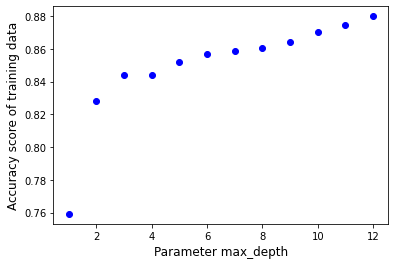

In [ ]:
x_axis = list(range(1,maxdepth))
plt.scatter(x=x_axis, y=list_train_scores, c ="blue") 
  
# To show the plot 
plt.ylabel("Accuracy score of training data", size=12) 
plt.xlabel("Parameter max_depth", size=12)
plt.show() 

### d. Plotting accuracy score Vs maxdepth for Test data

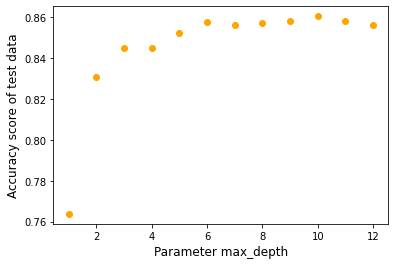

In [ ]:
plt.scatter(x=x_axis, y=list_test_scores, c ="orange") 
  
# To show the plot
plt.ylabel("Accuracy score of test data", size=12) 
plt.xlabel("Parameter max_depth", size=12)
plt.show() 


### e. Plotting accuracy Vs maxdepth for both Training and Test data together

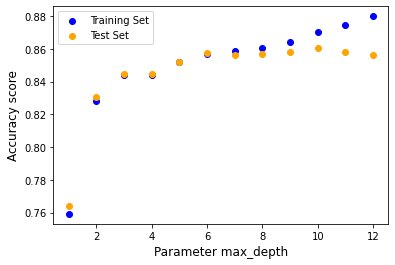

In [ ]:
ax = plt.gca()
ax.scatter(x=x_axis, y=list_train_scores, c ="blue") 
ax.scatter(x=x_axis, y=list_test_scores, c ="orange")
ax.set_xlabel("Parameter max_depth", size=12)
ax.set_ylabel("Accuracy score", size=12) 
ax.legend({'Training Set','Test Set'})
plt.show() 


## 2.1 Underfitting and overfitting in random forest classifiers. 
### a. Replace the DecisionTreeClassifier with a RandomForestClassifier

#### Evaluating TRAINING DATA set for different estimators and max_depths


In [ ]:
# Setting number of trees
estimators = [1,10,50,100,150,200,300,350,400,500]

# For jobs=1 only one CPU core will be used whereas for jobs=-1 all cores will be used to speed up the computation
jobs = [1,1,1,-1,-1,-1,-1,-1,-1,-1]
        
# The dictionary will store n_estimator value as "key" and list of accuracy scores for TRAINING SET as "value"
dict_train_scores = {}

for i,j in zip(estimators, jobs):
    
    # This list will store accuracy scores for different max_depth of the tree 
    list_acc_scores = []

    for d in range(1, maxdepth): ## maxdepth=13
    
        # Create a pipeline with preprocessor and classifier with number of trees as i and number of jobs as j(1 or -1)
        # Run the pipeline for various depths
        pipeline_r = make_pipeline(
          DictVectorizer(),
          RandomForestClassifier(n_estimators=i, n_jobs=j, max_depth=d)
        )
        pipeline_r.fit(X_train_dict, Y_train)

        # Predict the target for training data
        Y_train_pred = pipeline_r.predict(X_train_dict)

        # Calculate the accuracy score on the training set for true vs predicted values
        list_acc_scores.append(accuracy_score(Y_train, Y_train_pred))
    
    # This dictionary stores n_estimator value(number of trees) as "key" and list of accuracy scores as "value"
    dict_train_scores.update({i: list_acc_scores})

# print the ensemble size and and corresponding accuracy scores of training set
print(dict_train_scores)

{1: [0.8026166272534627, 0.7591904425539756, 0.7697859402352507, 0.8061177482264058, 0.7974877921439759, 0.7968121372193728, 0.8180338441694052, 0.838764165719726, 0.829489266300175, 0.8352016215718191, 0.8391019931820276, 0.847394121802156], 10: [0.7768496053561008, 0.7797672061668868, 0.8011424710543288, 0.832406867110961, 0.8377199717453395, 0.8413746506556924, 0.8453057338533829, 0.850925954362581, 0.8569761370965265, 0.8591873713952274, 0.8629648966555081, 0.8654525352415466], 50: [0.7591904425539756, 0.7723657135837352, 0.7843432327016984, 0.8199379625932864, 0.8329596756856362, 0.8464113510027333, 0.8513252049998464, 0.8555634040723565, 0.8585731396455882, 0.8621971069684592, 0.8685851171647062, 0.8714720063880101], 100: [0.7591904425539756, 0.7702159024599982, 0.7965050213445533, 0.8186787875065262, 0.8408525536684991, 0.8435551733669113, 0.8531986118362458, 0.8581738890083228, 0.8624427996683148, 0.8661281901661497, 0.8686158287521882, 0.8711034673382267], 150: [0.759190442553

#### Evaluating TEST DATA set for different estimators and max_depths


In [ ]:
# The dictionary will store n_estimator value as "key" and list of accuracy scores of TEST SET as "value"
dict_test_scores = {}

for i,j in zip(estimators, jobs):
    
    # This list will store accuracy scores for different max_depth of the tree 
    list_acc_scores = []

    for d in range(1, maxdepth):   ## maxdepth=13
    
        # Create a pipeline with preprocessor and classifier with number of trees as i and number of jobs as j(1 or -1)
        # Run the pipeline for various depths
        pipeline_r = make_pipeline(
          DictVectorizer(),
          RandomForestClassifier(n_estimators=i, n_jobs=j, max_depth=d)
        )
        pipeline_r.fit(X_train_dict, Y_train)

        # Predict the target for test data
        Y_test_pred = pipeline_r.predict(X_test_dict)

        # Calculate the accuracy score on the test set for true vs predicted values
        list_acc_scores.append(accuracy_score(Y_test, Y_test_pred))
    
    # Dictionary contains n_estimator value(number of trees) as "key" and list of accuracy scores as "value"
    dict_test_scores.update({i: list_acc_scores})

# print the ensemble size and corresponding accuracy scores of test set
print(dict_test_scores)

{1: [0.7678275290215588, 0.7707143295866348, 0.7777163564891592, 0.8011178674528592, 0.802653399668325, 0.8293716602174314, 0.8317056691849395, 0.8286960260426264, 0.8431914501566243, 0.8384620109329893, 0.8166574534733738, 0.8261777532092623], 10: [0.7637737239727289, 0.7761808242736933, 0.7721270192248634, 0.8175787728026535, 0.8290031324857196, 0.8418401818070144, 0.8503777409250046, 0.8483508384005897, 0.8508076899453351, 0.8529574350469873, 0.8578711381364781, 0.8590381426202321], 50: [0.7637737239727289, 0.7673361587126097, 0.7995209139487747, 0.8293716602174314, 0.8330569375345495, 0.8420858669614889, 0.8490878938640133, 0.8522818008721823, 0.8536330692217923, 0.8570726613844358, 0.8600208832381303, 0.8606350961243167], 100: [0.7637737239727289, 0.7690559547939316, 0.7946072108592839, 0.8204655733677293, 0.835329525213439, 0.8428229224249125, 0.8509305325225723, 0.8519132731404705, 0.8544315459738345, 0.8574411891161476, 0.8588538787543762, 0.8604508322584608], 150: [0.763773723

#### Plot the accuracies for different ensemble sizes

In [ ]:
# Plotting the accuracy score Vs maxdepths for various ensemble sizes
def plot(dict_train_scores, dict_test_scores, maxdepth):
  
    # Iterate through the ensemble size of training and test data 
    for k,t in zip(dict_train_scores.keys(),dict_test_scores.keys()):
        print("\n       FOR ENSEMBLE SIZE =",k)
        x_axis = list(range(1,maxdepth))
        
        # Retreive the accuracies for each ensemble size for both sets
        list_train_acc= dict_train_scores.get(k)
        list_test_acc = dict_test_scores.get(t)
        
        # Plot the graph
        ax = plt.gca()
        ax.scatter(x=x_axis, y=list_train_acc, c ="blue") 
        ax.scatter(x=x_axis, y=list_test_acc, c ="orange")
        ax.set_xlabel("Parameter max_depth", size=12)
        ax.set_ylabel("Accuracy score", size=12) 
        ax.legend({'Training Set','Test Set'})
        plt.show()


       FOR ENSEMBLE SIZE = 1


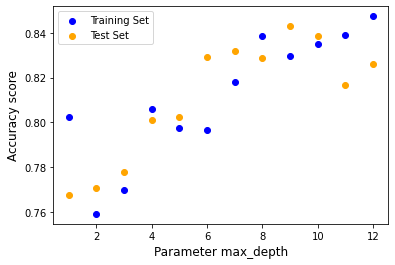


       FOR ENSEMBLE SIZE = 10


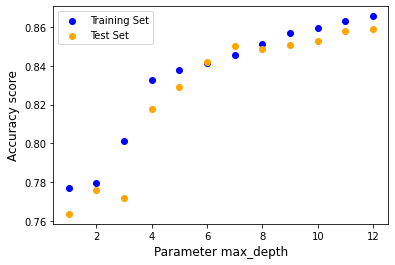


       FOR ENSEMBLE SIZE = 50


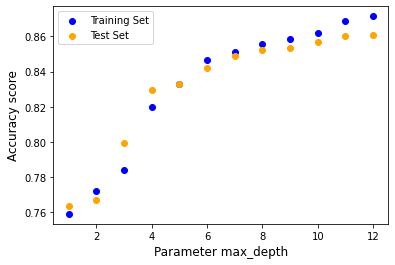


       FOR ENSEMBLE SIZE = 100


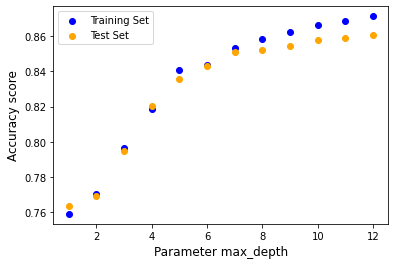


       FOR ENSEMBLE SIZE = 150


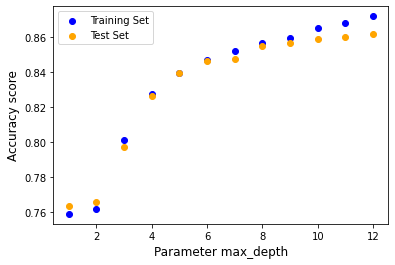


       FOR ENSEMBLE SIZE = 200


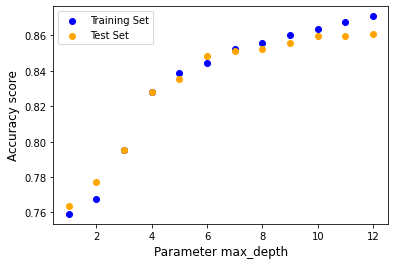


       FOR ENSEMBLE SIZE = 300


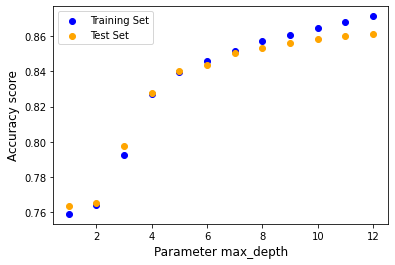


       FOR ENSEMBLE SIZE = 350


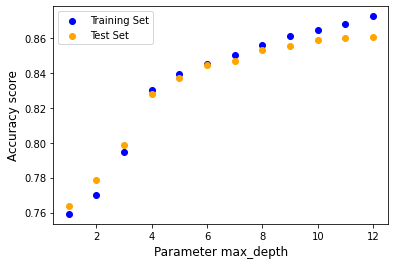


       FOR ENSEMBLE SIZE = 400


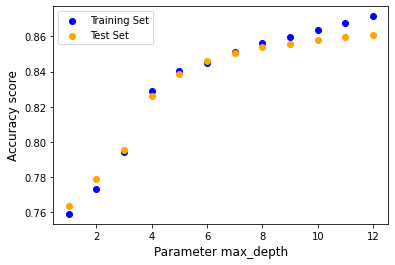


       FOR ENSEMBLE SIZE = 500


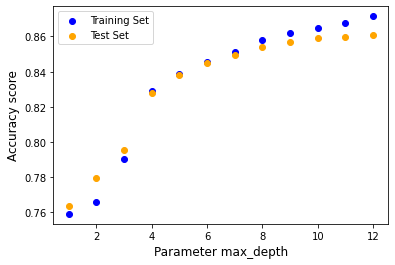

In [ ]:
# Plotting the graph
plot(dict_train_scores, dict_test_scores, maxdepth)

### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

**Observation:**
Using Decision Tree classifier the accuracy score for training set increases as the max depth of the tree increases but after certain point it stablises whereas the accuracy of test data keeps on increasing marginally with the max_depth of the tree.

In case of RandomForestClassifier however, accuracies are quite random when the max_depth increases. Infact there is no pattern observed between them. This is possibly due to below reasons.

**Reason for difference:**
In DecisionTree classifier entire data set is used for building the decision tree hence bootstrapping is not needed.
Also, here max_features = n_features, which means all features are used for best split unlike random forest.

However, In Random forest classifier -

a. By default, **bootstrap value is "True"** which means that if even we have ensemble size of N we will not provide the entire set as is to the classifier. Instead N samples are chosen from the entire data set RANDOMLY with replacement.

b. Secondly, by default **max_features is "auto"**. Whenever there is a time to split a particular node we use 
max_features which is sqrt(n_features) in this case hence less features are used everytime for best split. 


### What happens with the curve for random forests as the ensemble size grows?

Initially when the ensemble size increases, the **variance and bias decreases** as a result of which the accuracy score improves for sometime but after sometime it becomes constant. The **computation time** for sure **increases** as the tree size increases hence its not worth increasing the number of tree at the cost of increasing computation time.


### What happens with the best observed test set accuracy as the ensemble size grows?

The test set accuracy of the best observed data increases initially when the tree size grows but after certain time it stays constant. There is not much improvement in the accuracy after certain point. There is marginal improvement in the accuracy of test data set from **82.3% to 85.6%** when **ensemble size** increases from **1 to 10**. But upon further increasing the number of trees the accuracy remains constant at **86%** even for **ensemble size 500**.


### What happens with the training time as the ensemble size grows?

As the ensemble size grows the training time **increases** significantly. This is because more time is required to prepare more number of trees. Creating 10 decision trees would take considerably less time than 50 or 100 or more. Usually after a threshold the accuracies of such models do not improve hence we need to carefully decide on the trade off between computation cost and accuracy.

# Task 3: Feature importances in random forest classifiers

In [ ]:
# Create a pipeline with preprocessor and classifier with RandomForest
pipeline_r = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier(n_estimators=100)
)
pipeline_r.fit(X_train_dict, Y_train)

pipeline_r.fit(X_train_dict, Y_train)
scores=pipeline_r.steps[1][1].feature_importances_
features=pipeline_r.steps[0][1].feature_names_

In [ ]:
features_score = pd.DataFrame({'features': features, 'scores': scores}, columns=['features', 'scores'])
#print(features_score)
print('Sorted features by importance scores in reverse order')
features_sorted=features_score.sort_values(by=['scores'], ascending=False)
print(features_sorted)

Sorted features by importance scores in reverse order
                                      features    scores
20                                      fnlwgt  0.162921
0                                          age  0.148932
1                                 capital-gain  0.091528
21                              hours-per-week  0.082351
3                                education-num  0.066592
..                                         ...       ...
57   native-country=Outlying-US(Guam-USVI-etc)  0.000024
73                     occupation=Armed-Forces  0.000020
45                     native-country=Honduras  0.000006
102                     workclass=Never-worked  0.000002
44           native-country=Holand-Netherlands  0.000000

[108 rows x 2 columns]


**Feature importance** is a class of techniques for calculating scores for input features in a predictive model. These scores indicate the relative importance of each feature when making a prediction. The higher the numbers returned from forest.feature_importances_ mean they are more important in the classification task.
It is observed that the top 5 most important features are
  
1. fnlwgt
2. age
3. capital-gain  
4. hours-per-week  
5. education-num

Because the target of this model is predicting if a person's income is higher than 50K or less, it seems reasonable that some of the important features like age, capital-gain, hours-per-week and education-num have an important role in the prediction.


# Alternative way to compute some sort of importance score of individual features
There are three different methods to calculate the feature importance:
1. Feature Importance built-in the Random Forest algorithm,
2. Feature Importance computed with Permutation method,
3. Feature Importance computed with Drop-column method.

In the following we discussed the first two methods.

The first method that is default in python simply tells us which ones of the features are more useful when building the model. They are not to be interpreted as a direct dependence between predictor and target.

The Permutation method measures how much the prediction error of the model increases after we permuted the feature's values, which breaks the relationship between the feature and the true outcome.

In this method a feature has a higher score if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. 

Comparing these two methods, the permutation method is much more computationally expensive than the first method, but the results are more reliable. The permutation method does not require retraining the model after permuting each column and perturbed test samples through the already-trained model need to be rerunned.
